## Text classification: Spam or Ham

In this example based on the classical dataset Spambase Dataset (https://archive.ics.uci.edu/ml/datasets/spambase) we will try to make our own spam filter using scikit-learn library. The dataset contains text corpora of  5.574 text messages with labels "spam" or "ham".

### Data

Data are attached to the task description for your convinience

In [ ]:
import pandas as pd
df = pd.read_csv('3_data.csv', encoding='latin-1')

We delete all other columns except for two of interest: text messages and labels:

In [ ]:
df = df[['v1', 'v2']]
df = df.rename(columns = {'v1': 'label', 'v2': 'text'})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Delete duplicates:

In [ ]:
df = df.drop_duplicates('text')

Change labels to binary:

In [ ]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

### Text pre-processing (Task)

We need to complete the function for text pre-processing, to pre-process the text the following way:
* convert text to lowercase;
* remove stop-words;
* remove punctuation marks;
* normalizes the text using Snowball stemmer.

We recommend to use the NLTK library, in order not to compile a list of stop-words and not to implement the stemming algorithm yourself. Click the link to find the examples of stemmers application (https://www.nltk.org/howto/stem.html).

In [48]:
from nltk import stem
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
nltk.download('punkt_tab')
stemmer = SnowballStemmer("english")

stemmer = stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [word.lower() for word in words]
    filtered_words = [word for word in words if word not in stopwords]
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    # your code here
    tokens = stemmed_words
    corrected_tokens = []
    i = 0

    while i < len(tokens):
      if tokens[i] == "gon" and i < len(tokens) - 1 and tokens[i + 1] == "na":
        corrected_tokens.append("gonna")  # Combine 'gon' and 'na'
        i += 2  # Skip the next token
      else:
        corrected_tokens.append(tokens[i])
        i += 1

    preprocessed_text = ' '.join(corrected_tokens)
    print(preprocessed_text)
    return preprocessed_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Check that the function works correctly

In [49]:
assert preprocess("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.") == "im gonna home soon dont want talk stuff anymor tonight k ive cri enough today"
assert preprocess("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...") == "go jurong point crazi avail bugi n great world la e buffet cine got amor wat"

im gonna home soon dont want talk stuff anymor tonight k ive cri enough today
go jurong point crazi avail bugi n great world la e buffet cine got amor wat


Apply to the text:

In [50]:
df['text'] = df['text'].apply(preprocess)
df['text']

Выходные данные были обрезаны до нескольких последних строк (5000).
hmmm thk sure got time hop ard ya go 4 free abt muz call u discuss liao
time come later
bloodi hell cant believ forgot surnam mr ill give u clue spanish begin
well im gonna finish bath goodfin night
let know youv got money carlo make call
u still go mall
turn friend stay whole show wont back til ltgt feel free go ahead smoke ltgt worth
text doesnt repli let know log
hi spoke maneesha v wed like know satisfi experi repli toll free yes
lift hope offer money need especi end month approach hurt studi anyway gr8 weekend
lol u trust
ok gentleman treat digniti respect
guy close
go noth greatbi
hello handsom find job lazi work toward get back net mummi boytoy miss
haha awesom minut
plea call custom servic repr freephon 0808 145 4742 9am11pm guarant å1000 cash å5000 prize
got xmas radio time get
jus reach home go bath first sis use net tell u finish k
uniqu enough find 30th august wwwareyouuniquecouk
im sorri ive join leagu peo

,text
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkts 2...
3,u dun say ear hor u c alreadi say
4,nah dont think goe usf live around though
...,...
5567,2nd time tri 2 contact u u å750 pound prize 2 ...
5568,ì_ b go esplanad fr home
5569,piti mood soani suggest
5570,guy bitch act like id interest buy someth el n...


### Split the data to the training and test set

In [51]:
y = df['label'].values

Now we need to split the data to test (test) and training (train) sets. Scikit-learn library contains ready to use tools to do it.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.35, random_state=34)
X_test

,text
5061,havent stuck orchard dad car go 4 dinner u leh...
5252,studi alon without anyon help cant need studi
1554,yeah tote u wan na
696,aight close still around alex place
4799,cool tyler take gonna buy drop place later ton...
...,...
5338,wan na gym
2936,lol yep yesterday alreadi got fireplac anoth i...
5008,mobil numberpl sms ur mail idconvey regard ach...
1606,ok prob ill come lunch


### Classifier training

We came to the classifier training now.

First we extract features from the texts. It is strongly recommened to try several methods in order to check how each method influences the result (more information on defferent text representation methods you can find on the link https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction).

Then we train the classifier. We use SVM, but you can try different algorithms.

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# exctract features from the texts
vectorizer = TfidfVectorizer(decode_error='ignore')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [59]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

#train SVM model

model = LinearSVC(random_state = 34, C = 1.3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Selfcheck. If the function ```preprocess``` is complimented correctly, then you should get the following model evaluation results.
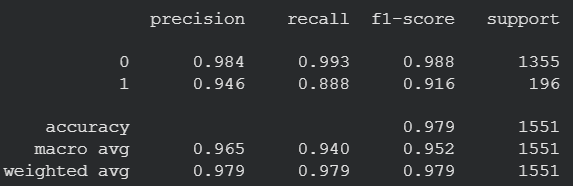

In [60]:
print(classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.982     0.998     0.990      1573
           1      0.986     0.882     0.931       237

    accuracy                          0.983      1810
   macro avg      0.984     0.940     0.961      1810
weighted avg      0.983     0.983     0.982      1810



Let's predict results for the specified text

In [61]:
pred_txt = ["Excellent collection of articles and speeches.",
            "You are cordially invited to the 2021 International Conference on Advances in Digital Science (ICADS 2021), to be held at Salvador, Brazil, 19 – 21 February 2021, is an international forum for researchers and practitioners to present and discuss the most recent innovations. Ответ {$а} Вопрос 1",
            "URGENT! We are trying to contact U.Todays draw shows that you have won a 2000 prize GUARANTEED. Call 090 5809 4507 from a landline. Claim 3030. Valid 12hrs only.",
            "Machine factory for sale. Low price. 2 hectare property, 150,000 square feet production floor, 500 machine tools installed."]
pred_txt = [preprocess(txt) for txt in pred_txt]
pred_txt = vectorizer.transform(pred_txt)

excel collect articl speech
cordial invit 2021 intern confer advanc digit scienc icad 2021 held salvador brazil 19 21 februari 2021 intern forum research practition present discuss recent innov ответ а вопрос 1
urgent tri contact utoday draw show 2000 prize guarante call 090 5809 4507 landlin claim 3030 valid 12hrs
machin factori sale low price 2 hectar properti 150000 squar feet product floor 500 machin tool instal


In [62]:
model.predict(pred_txt)

array([0, 0, 1, 0])

The message is classified as spam.